In [1]:
import torchtext.data as data
from torchtext.data import BucketIterator
import torch
from torch import nn
from torch_struct import HMM, LinearChainCRF
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# dist = LinearChainCRF(log_potentials) 
# labels = LinearChainCRF.struct.to_parts(label.transpose(0, 1), C, lengths=lengths) \
#                             .type_as(dist.log_potentials)
# loss = dist.log_prob(labels).sum()
# (-loss).backward()
# opt.step()

In [3]:
#add bos
class ConllXDataset(data.Dataset):
    def __init__(self, path, fields, encoding="utf-8", separator="\t", **kwargs):
        examples = []
        columns = [[], []]
        column_map = {1: 0, 3: 1}
        with open(path, encoding=encoding) as input_file:
            for line in input_file:
                line = line.strip()
                if line == "":
                    examples.append(data.Example.fromlist(columns, fields))
                    columns = [[], []]
                else:
                    for i, column in enumerate(line.split(separator)):
                        if i in column_map:
                            columns[column_map[i]].append(column)
            examples.append(data.Example.fromlist(columns, fields))
        super(ConllXDataset, self).__init__(examples, fields, **kwargs)

In [4]:
WORD = data.Field()
POS = data.Field(is_target=True) # init_token="<bos>", eos_token="<eos>"
fields = (('word', WORD), ('pos', POS))

In [5]:
train = ConllXDataset('/Users/sofia/pytorch-struct/examples/data/sam.conllu', fields)

WORD.build_vocab(train)
POS.build_vocab(train)
#print(vars(POS.vocab))

In [6]:
train_iter = BucketIterator(train, batch_size=2, device='cpu', shuffle=False)

In [7]:
C = len(POS.vocab.itos)
V = len(WORD.vocab.itos)
C, V

(6, 7)

torch.Size([4, 2]) torch.LongTensor False 
 tensor([[5, 3],
        [3, 2],
        [2, 5],
        [4, 4]])
gold 
 torch.Size([2, 3, 6, 6]) 
 tensor([[[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0.

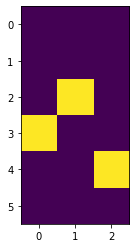

torch.Size([4, 2]) torch.LongTensor False 
 tensor([[3, 5],
        [2, 2],
        [4, 3],
        [1, 4]])
gold 
 torch.Size([2, 3, 6, 6]) 
 tensor([[[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0.

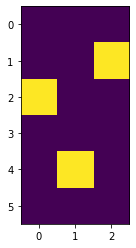

torch.Size([4, 1]) torch.LongTensor False 
 tensor([[2],
        [3],
        [5],
        [4]])
gold 
 torch.Size([1, 3, 6, 6]) 
 tensor([[[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1.],
          [0., 0., 0., 0., 0., 0.]]]])
tensor([[[0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1., 0.]]])


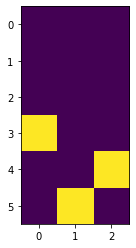

In [8]:
def show_chain(chain):
    plt.imshow(chain.detach().sum(-1).transpose(0, 1))
    
for i, ex in enumerate(train_iter):
    #print(i, ex)
    label = ex.pos
    #label.requires_grad=True
    print(label.shape, label.type(), label.requires_grad, '\n', label)

    gold = LinearChainCRF.struct.to_parts(label.transpose(0, 1).type(torch.LongTensor), C).type(torch.FloatTensor) # b x N, C -> b x (N-1) x C x C 
    print('gold \n', gold.shape, '\n', gold)
    out = LinearChainCRF(gold)
    
    print(out.argmax.sum(-1))
    
    show_chain(out.argmax[0])
    plt.show()